<a href="https://colab.research.google.com/github/CefasRepRes/shipwreck-oil-detection-colab/blob/main/notebooks/UserInterface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloud Based Analysis of Oil Spills from Wrecks
This is a workflow on how to use Google Earth Engine (GEE) with Google Colab to identify and detect oil from shipwreck

Project funded by DEFRA .

Created By Hayden Close (Cefas)
hayden.close@cefas.gov.uk

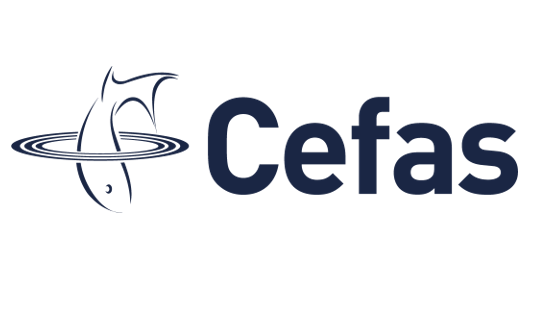

#1 Installation and set-up of workspace

## 1.1 Connect to google drive
First of all connect your google drive account with colab so you can store inputs such as wreck locations and even scripts with functions in.

Note: the wreck database is located on the sharepoint for Cefas Staff.

In [1]:
import google.colab.drive
google.colab.drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##1.2 Install and import required libraries
Google Colab has lots of packages aready installed but some need to be installed in the virtual environment. These need to be installed everytime you reload the tool.



In [2]:
!pip install geemap > /dev/null 2>&1;                                                               # Need to install geeMap for easy iteractive plotting
!pip install geopandas > /dev/null 2>&1;                                                            # Install geopandas
!pip install plotly > /dev/null 2>&1;                                                               # Install Ploty for interactive graphs
import ee                                                                                           # To access the earth engine catalogue
import geemap                                                                                       # Imports the geeMap package into environment
import geopandas                                                                                    # Makes working with geospatial data in python easier
import pandas as pd                                                                                 # Useful package to read/export csv's etc...
import ipyleaflet                                                                                   # Needed for interactive plotting
import ipywidgets as widgets                                                                        # Way to have widgets onto geemaps
import math                                                                                         # Used in the gammafilter function
import plotly.express as px                                                                         # Used to plot the spills over time or the values from a line
import os                                                                                           # Used for reading files in the file directory
import requests                                                                                     # Used for adding error messages
from typing import Union, List                                                                      # For adding lists to the widgets
from PIL import Image                                                                               # Reads in images
import glob                                                                                         # Used for helping to find files in folders
print('Libraries installed')                                                                        # Prints messagewhen completed the installs

Libraries installed


##1.3 Download Wreck Tools python functions file

Downloads the wreck tools python file from GitHub with all the functions to run the tools with the latest updates.
See the script for documentation of the various functions.


In [3]:
os.chdir('/content')
!wget -O Cloud_Based_Oil_Tools.ipynb https://raw.githubusercontent.com/CefasRepRes/shipwreck-oil-detection-colab/main/notebooks/Cloud_Based_Oil_Tools.ipynb
%run /content/Cloud_Based_Oil_Tools.ipynb

--2024-08-29 14:48:15--  https://raw.githubusercontent.com/CefasRepRes/shipwreck-oil-detection-colab/main/notebooks/Cloud_Based_Oil_Tools.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110320 (108K) [text/plain]
Saving to: ‘Cloud_Based_Oil_Tools.ipynb’

Cloud_Based_Oil_Too 100%[===================>] 107.73K  --.-KB/s    in 0.005s  

2024-08-29 14:48:15 (21.4 MB/s) - ‘Cloud_Based_Oil_Tools.ipynb’ saved [110320/110320]



##1.4 Autenticate Earth Engine servers
To access the satelite imagery catalogues you are required to autenticate yourself via your google account. The cefas team will add your email address to approved users.

Upon running the following code chunk you'll need to follow the instruction to grant Earth Engine access to your Google account.

In [4]:
# Trigger the authentication flow.. Only need to do once a week
ee.Authenticate()
# Initialize the library
ee.Initialize(project = 'cefas-wreck-oil-detection23')

# 2 Set up mapping parameters
Run the below `SetUp()` to generate the options to tailor the mapping.

1.   Drop down of pre-dertermined wrecks from an CSV that should be uploaded to your google drive.
2.   Select the start date, either type it or click the calendar icon to select the date.
3.   Select the end date, either type it or click the calendar icon to select the date.
4.   Click the satellites that you wish to use.
      *   SENTINEL-1 - Only uses this satellite in the tool that uses Synthetic-aperture radar (SAR) that is not affected by cloud cover.
      *   SENTINEL-2 - Only uses visibile light with multispectral sensors but cannot see through clouds.
      *   BOTH - Uses both satellites in the tool.

5.   Select the orbit pass of the SENTINEL-1 satallite whether you want to use ascending, descending or both.

6.   Select the maximum cloud percentage. Unless lots of cloud, 100% recommend as the area of interest may not actually be covered.
7.   Select the pixel dilation factor, expands the selected pixels from the threshold by this number
8.   Removes objects that have a total number of pixels smaller than this number.















In [5]:
SetUp()

Dropdown(description='Wreck:', index=1, options=('Aaron Ward', 'Atlanta', 'Azumasan Maru', 'Canberra', 'Hiei',…

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

RadioButtons(description='Satellites:', index=2, options=('SENTINEL-1', 'SENTINEL-2', 'BOTH'), value='BOTH')

RadioButtons(description='Sentinel-1 Orbit Pass:', index=2, options=('ASCENDING', 'DESCENDING', 'BOTH'), value…

IntSlider(value=100, description='Max cloud%', layout=Layout(width='400px'))

IntSlider(value=3, description='Dilation factor', layout=Layout(width='400px'), max=30)

IntSlider(value=250, description='Pixel Filter', layout=Layout(width='400px'), max=1000)

# 3 Create Timelapses
You can change the speed of the Timelapse using the Frames Per Second (FPS) slider. Additionally you can adjust the quality of the images downloaded although you may get an error for values much past `2700`.



*   Depending on how many images there are in the time period, it can take a few minutes to half an hour to start downloading the images, so please dont keep pressing the `Run TimeLapse` button.
*    The images are downloaded using parellel processing so may not appear in order.
*   Sometimes colab may stop responding, check your google drive to see if the process is still runing before restarting. Multiple years will take many hours to download.
*   If you restart colab, the tool will automatically skip any images that have been downloaded. **ENSURE** the date range is the same.
*   Downloaded images are automatically deleted to save space and declutter but can be kept if desired.
*   A **Warning** will be produced that can be ignored.

See below for how to download and view the timelapses.




In [ ]:
CreateTimeLapse()

# 3.1 Downloading and Viewing Timelapses

You can download the videos by going to the files on the right hand side, hover over the timelapse of interest and click the three dots to the right of the name. Click download from the popup box and your web browser should automatically start downloading it. If you cannot play the video on your computer you may need to download the latest 'mp4' codecs for playing the video software on your laptop, alternatively you can download a free open source videoplayer called VLC, this has many of these built in and is widely used as an alternative. This can be downloaded from the [VLC website](https://www.videolan.org/vlc/). You may need admin permissions to install.

Alternatively, you can view your timelapses in your google drive online, but can be slow and the image quality is reduced.

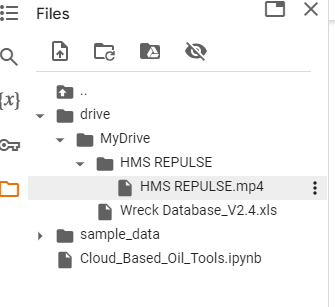
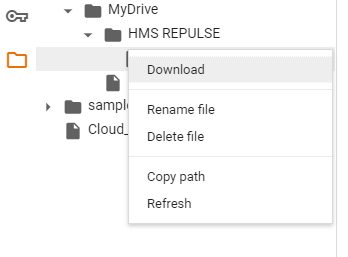

#4 Run the Mapping tool
The code below `OilMapping()` can take a few seconds to initiate.

 **1.** If no oil detected just press next image button (bottom right).
 >>**A.** If on the image you see potential oil use the polygon or rectangle tool to draw around the slick (toolbar on the left).

**2.**   Next press the detect potential oil button


>> **A.** If the oil is not delineated, try changing the pixel threshold values (bottom left slider), if unsure of values use the threshold detector tool (see below).

>> **B.** If still not showing try reducing the pixel filter value in the slider in the set-up above where you select the wreck and dates.


**3.**   Once happy with the delineation, press next image. This will move on to the next sequential image in the image collection. This will save the polygon/append to existing ones. Additionally, it will add the data to the table along with the metadata.

**4.** A random colour will be applied to the delineated slick. The tool will  only show the latest three delineated oil slicks.

**5.** If you want to go back to a previous image, press the 'previous image' button (bottom left).
>>**A.** If you go back you will need re-delineate the oil slicks as the data will be overwritten, assumes no oil.

***NOTE:*** Sometime the tool can be very slow, this is generally related to high usage on the google servers











In [11]:
OilMapping()

Map(center=[-9.226899999999999, 159.91080000000002], controls=(WidgetControl(options=['position', 'transparent…

##4.1 Displaying the data
Run the below code to show the data. Here you can also add a comment for the previous image. i.e. **Commit comment** once you have gone to the next or previous image

*Note: for the comment to show in the table you need to rerun the code*

In [113]:
Display_Data()

Textarea(value='', description='Comment:', placeholder='Add comment for image here')

Button(description='Commit comment', icon='check', style=ButtonStyle(), tooltip='Description')

,Wreck_Name,Image_ID,Date,Oil_Area_m2,Low_Threshold,High_Threshold,Satellite,Comment


##4.2 Tool for optimising the Threshold
Draw a line on the map across the suspected oil spill, then run the tool below to get an interactive chart. For detailed instructions see below section `4.21`

##4.21 Instructions on how to optimise the thresholding

If you are having difficulties getting the correct value for the threshold you can use the below tool.
First clear all drawing on the map by using the bin icon in the widgets on the left hand side and press clear all.

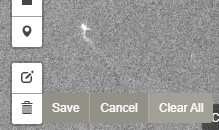

Afterwards draw a line across the suspected oil leak like the image below using the line tool, the line can have multiple points (see below). 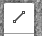 Double click the final point to finish the line.

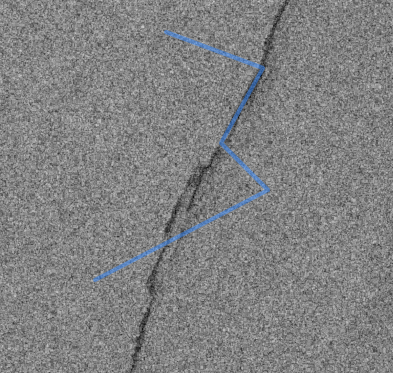

##4.22 Threshold tool
Before running, draw a small line across any potential oil features then run the tool as instructions above. The result is a plot with pixel values across this line where you can attempt to pick out a value.

In [12]:
value_detector(img)

## 5 View  delineated potential slicks
Plots the all the polygons on an interactive map to explore all polygons delineated.

In [136]:
Plot_Polygons()

KeyboardInterrupt: 

#6 Download Data
Downloads the data as a CSV and polygons as a shapefile. Select either to append to the current data or to overwrite. **Note** it can take a little while to start the download. If running for the wreck for the first time use the overwrite button.

In [ ]:
Download_Data()

RadioButtons(description='Please select option before download', options=('Append data', 'Overwrite'), value='…

Button(description='Download Data', style=ButtonStyle())

CSV_downloaded
Starting shapefile download
shapefile download READY waiting on google servers to start download
shapefile download RUNNING
shapefile download RUNNING
shapefile download RUNNING
shapefile download RUNNING
shapefile download RUNNING
shapefile download RUNNING
Initial shapefile download completed. Please wait for it to appear..
shapefile download COMPLETED


In [108]:
DateS1 = [timestamp.date() for timestamp in DateS1]
DateS2 = [timestamp.date() for timestamp in DateS2]



'2015-12-18'

In [6]:
import pandas as pd
Loaded = True
# Define the path to the excel file
excel_file = "/content/drive/MyDrive/Solomon observed oil leaks.xlsx"

# Read the excel file with the sheet 'Kanawha'
df = pd.read_excel(excel_file, sheet_name='CANBERRA')

# Print the first 5 rows of the DataFrame
print(df.head())


df_S1 = df[df['Satelite'] == 'S1']

# Filter the dataframe where 'Satellite' column equals 'S1'
df_S2 = df[df['Satelite'] == 'S2']

# Extract the dates from the 'Date' column of the filtered dataframe into a list
DateS1 = df_S1['Date'].tolist()
# Extract the dates from the 'Date' column into a list
DateS2 = df_S2['Date'].tolist()

DateS1 = [timestamp.date() for timestamp in DateS1]
DateS2 = [timestamp.date() for timestamp in DateS2]
from datetime import datetime, timedelta, date
#image_collection = S1ImgCol
#date_list = DateS1
def filter_by_dates(image_collection, date_list):
    for dates in date_list:
        # Check if 'dates' is a datetime.date
        if isinstance(dates, date):
            dates = datetime(dates.year, dates.month, dates.day)  # convert date to datetime
        next_day = dates + timedelta(days=2, seconds=-1)  # add one day (and subtract one second)
        image_collection = image_collection.filterDate(str(dates), str(next_day))
    return image_collection



        Date Satelite Quality  Comment
0 2016-09-03       S2      Ok      NaN
1 2017-01-06       S1      Ok      NaN
2 2017-01-11       S2      Ok      NaN
3 2017-03-02       S2      Ok      NaN
4 2017-03-26       S1      Ok      NaN


In [10]:
def addDate(feature):                                                                               # Function to add date to the individual polygons
  return feature.set({'Date': date_string,'ImgNo': n, 'PolyNo': m, 'Satellite': Sat,'Image_ID':ImgName, 'Area_m2': spillarea })                                # Adds the date to the feature part of each polygon in the feature collection

def has_layer(map_object, layer_name):
    return layer_name in [layer.name for layer in map_object.layers]

def add_S1Gamma_date(image):                                                                        # Extract the date for for the S1 Gamma corrected images as some metadata removed during the processing
 year = ee.Image(image).getString('system:index').slice(-50, -46)                                    # Select out the year
 month = ee.Image(image).getString('system:index').slice(-46, -44)                                   # Select out the month
 day = ee.Image(image).getString('system:index').slice(-44, -42)                                     # Select out the day
 Date = ee.String(year.cat('-').cat(month).cat('-').cat(day))                                       # Format to date format e.g. 2023_01_01
 Satellite = ee.Image(image).getString('system:index').slice(-67, -64)                                  # Select the name of the satellite to filter
 return image.set('Date', Date, 'Satellite',Satellite)

def add_S1_date(image):                                                                             # Select out the date and metadata for S1 imagery
    date = image.date().format('YYYY-MM-dd')                                                        # Get the date
    Satellite = ee.Image(image).getString('familyName')                                             # Get the satellite name
    platform_number = ee.Image(image).getString('platform_number')                                  # Get the name i.e. 1a or 1b
    Satellite = Satellite.cat(platform_number)                                                      # Combine these together
    return image.set('Date', date, 'Satellite',Satellite )                                          # Return the image with the added data

def add_S2_date(image):                                                                             # Select out the date and metadata for S2 imagery
    date = image.date().format('YYYY-MM-dd')                                                        # Get the date
    Satellite = ee.Image(image).getString('SPACECRAFT_NAME')                                        # Get the satellite name
    return image.set('Date', date, 'Satellite',Satellite )                                          # Return the image with the added data

def update_slider(img):                                                                             # Function to update the threshold slider
  if ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1 do below changes
       Slider_value=[-20,-12]                                                                       # Default slider settings
       Slider_min=-20.0                                                                             # Min value
       Slider_max=-5.0                                                                              # Max value
       Slider_step=0.1                                                                              # Step change in slider
       ChangeThreshformat='.1f'                                                                     # Change format to 1 decimal place
  else:                                                                                             # If S2 then apply below
       Slider_value=[2350,3000]                                                                     # Default slider settings
       Slider_min=1000                                                                              # Min value
       Slider_max=5000                                                                              # Max value
       Slider_step=25                                                                               # Step change in slider
       ChangeThreshformat='d'                                                                       # Change format to integer
  if Slider_max < ChangeThresh.min:                                                                 # slider doesnt like it if the Max less than min
     ChangeThresh.min = Slider_min                                                                  # Changes the slider min value
     ChangeThresh.max = Slider_max                                                                  # Changes the slider max value
  else:                                                                                             # If max greater than min then...
     ChangeThresh.max = Slider_max                                                                  # Changes the slider max value
     ChangeThresh.min = Slider_min                                                                  # Changes the slider min value
  ChangeThresh.step = Slider_step                                                                   # Update slider step value
  ChangeThresh.value = Slider_value                                                                 # Update slider default value
  ChangeThresh.readout_format=ChangeThreshformat                                                    # Change formatting of display

def incidence_angle_to_image(col):
    incidence_angle = col.select('angle')  # Get the angle band
    vv = col.select('VV')  # Select the 'VV' band
    new_band = vv.add(incidence_angle.multiply(0.776).subtract(31.638)).divide(2)  # Apply the formula to create the new band
    return col.addBands(new_band.rename('angle_VV'))

def convert_to_multipolygon(feature):
    geometries = feature.geometry().geometries()
    features = geometries.map(lambda geo: ee.Feature(ee.Geometry(geo)).set('geoType', ee.Geometry(geo).type()))
    polygons = features.filter(ee.Filter.eq('geoType', 'Polygon'))
    multipolygon = ee.Geometry.MultiPolygon(polygons.map(lambda feature: ee.Feature(feature).geometry()))
    return ee.Feature(multipolygon).copyProperties(feature)

def OilMapping():                                                                                   # Function to display map
 global ImgList, Oil_Polygons, Datatable, n, m, date_string, output_widget, Oil_Polygonstmp,img, ChangeThreshWidget, ChangeThresh, ImgListGM, img_B_OSI,Sat,ImgName, MultiMap# Need to make sure it brings the data from outside the function
 if 'Datatable' in vars():                                                                          # Deletes the tabletable so to start fresh
  del Datatable
 Oil_Polygons = ee.FeatureCollection([])                                                            # Need an empty FeatureCollection to Append our polygons to, add here so resets

 Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                           # Load in the wreck list
 Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])               # Get the latitude of selected wreck
 Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                             # Get the longitude of selected wreck
 geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);
 if SatelliteNo.value == 'SENTINEL-1' or SatelliteNo.value == 'BOTH':                               # If to see if create feature collection with S1 or both
   # Initialize an empty ImageCollection
   S1ImgCol = ee.ImageCollection([])
   for date in DateS1:
      date_str = date  # Use the loop variable 'date'
      new_date_object = date_str + timedelta(days=1)# Add one day to the date
      # Get the images for the current date and merge with the existing ImageCollection
      current_images = (ee.ImageCollection('COPERNICUS/S1_GRD')
                      .filterDate(str(date_str), str(new_date_object))  # Use the same date for start and end
                      .filterMetadata('instrumentMode', 'equals', 'IW') # Selects the instrument mode that we want
                      .filterBounds(geom))    # Selects only images that our wreck is contained within
      S1ImgCol = S1ImgCol.merge(current_images)

   if str(orbit.value) == 'ASCENDING':                                                              # If Chosen a orbit value of ascending
     S1ImgCol = S1ImgCol.filter(ee.Filter.eq('orbitProperties_pass', str(orbit.value)))             # Filter the Image collection
   if str(orbit.value) == 'DESCENDING':                                                             # If Chosen a orbit value of descending
     S1ImgCol = S1ImgCol.filter(ee.Filter.eq('orbitProperties_pass', str(orbit.value)))             # Filter the Image collection
   S1ImgCol = S1ImgCol.filter(ee.Filter.listContains('system:band_names', 'VV'))                    # Only selects VV band as missing in some images
   S1ImgCol = S1ImgCol.map(add_S1_date)                                                             # Adds the image date to image metadata in easy way to read
   ImgCol_gammaMap = S1ImgCol.map(gammaMap)                                                         # Process the ImageCollection through the gammaMap algorithm
   ImgCol_gammaMap = ImgCol_gammaMap.map(incidence_angle_to_image)
   S1ImgCol = S1ImgCol.map(incidence_angle_to_image)                                                # Process the ImageCollection through the angle correction algorithm
   ImgCol_gammaMap = ImgCol_gammaMap.map(add_S1Gamma_date)                                          # Gamma function removes alot of the metadata so add date back in


 if SatelliteNo.value == 'SENTINEL-2' or SatelliteNo.value == 'BOTH':                               # If to see if create feature collection with S2 or both
   # Initialize an empty ImageCollection
   S2ImgCol = ee.ImageCollection([])
   for date in DateS2:
      date_str = date  # Use the loop variable 'date'
      new_date_object = date_str + timedelta(days=1)# Add one day to the date
      # Get the images for the current date and merge with the existing ImageCollection
      current_images = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
                      .filterDate(str(date_str), str(new_date_object))                                # Use the same date for start and end
                      .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', max_cloud_cover.value) # Filter image collection by cloud cover
                      .filterBounds(geom) # Selects only images that our wreck is contained within
                      .select(['B2', 'B3', 'B4','B5', 'B6', 'B7']))
      S2ImgCol = S2ImgCol.merge(current_images)
   S2ImgCol = S2ImgCol.map(add_S2_date)                                                             # Add the image date to the metadata in an easy way to read
   S2ImgCol = remove_duplicates(S2ImgCol)

 if SatelliteNo.value == 'BOTH':                                                                    # If both S1 and S2 combine collections
   ImageCol = S1ImgCol.merge(S2ImgCol)                                                              # Merge ImageCollections, note raw S1
   ImageCol = ImageCol.sort("Date")                                                                 # Order images by Date
 elif SatelliteNo.value == 'SENTINEL-1':                                                            # Create collections based just on S1
   ImageCol = S1ImgCol                                                                              # ImageCollection = S1
 elif  SatelliteNo.value == 'SENTINEL-2':                                                           # Create collections based just on S2
   ImageCol = S2ImgCol                                                                              # ImageCollection = S2

 if SatelliteNo.value == 'BOTH':                                                                    # If both S1 and S2 combine collections
   ImageCol = S1ImgCol.merge(S2ImgCol)                                                              # Merge ImageCollections, note raw S1
   ImageCol = ImageCol.sort("Date")                                                                 # Order images by Date
   ImgList = ee.ImageCollection(ImageCol).toList(20)                                             # Creates a list of the images to select from
   ImageColGM = ImgCol_gammaMap.merge(S2ImgCol)                                                     # Merge ImageCollections, note gammaS1
   ImageColGM = ImageColGM.sort("Date")                                                             # Order images by Date
   ImgListGM = ee.ImageCollection(ImageColGM).toList(99999)                                         # Creates a list of the d images to select from
 elif SatelliteNo.value == 'SENTINEL-1':                                                            # Create collections based just on S1
   ImageCol = S1ImgCol                                                                              # ImageCollection = S1
   ImgListGM = ee.ImageCollection(ImgCol_gammaMap).toList(99999)                                    # Creates a list of the gammacorrected images to select from
 elif  SatelliteNo.value == 'SENTINEL-2':                                                           # Create collections based just on S2
     ImageCol = S2ImgCol                                                                            # ImageCollection = S2
 ImgList = ee.ImageCollection(ImageCol).toList(20)                                               # Creates a list of the images to select from
 Datatable = pd.DataFrame(columns = ['Wreck_Name','Image_ID', 'Date', 'Oil_Area_m2','Low_Threshold','High_Threshold', 'Satellite','Comment'])# Empty dataframe for polygon oil spill area
 MultiMap = geemap.Map()                                                                            # Base map
 MultiMap.centerObject(geom, 10)                                                                    # Center the map on the wreck
 m = 0                                                                                              # Number to assign polygon number
 n = 0                                                                                              # Used to add or subtract to change the image
 img = ee.Image(ee.List(ImgList).get(n))
 if SatelliteNo.value == 'BOTH':
    if img.getString('Satellite').getInfo() in ['SENTINEL-1A', 'SENTINEL-1B']: # If S1 use below parmaeters
     img = img.select('angle_VV')                                                                      # Selects the angle_VV band
     img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}                                            # Display setting for the angle_VV band
    else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}                                # Otherwise select the RGB bands
 elif SatelliteNo.value == 'SENTINEL-1':
     img = img.select('angle_VV')                                                                      # Selects the angle_VV band
     img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}
 else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}
 if SatelliteNo.value == 'SENTINEL-2' and Loaded == True:
   IMgdate = DateS2[n]                                                                             # Get the acquisition date of the image
   date_string = IMgdate.strftime("%Y-%m-%d")
 else:
    IMgdate = img.date()                                                                               # Get the acquisition date of the image
    date_string = IMgdate.format('YYYY-MM-dd').getInfo()
 MultiMap.addLayer(img, img_params, 'Satellite Image',True)                                         # Add the image to the map
 output_widget = widgets.Output(layout={'border': '1px solid black'})                               # Set up widget for adding date
 output_control = ipyleaflet.WidgetControl(widget=output_widget, position='bottomright')            # Method to add widget
 MultiMap.add_control(output_control)                                                               # Adds the widget
 with output_widget:                                                                                # The date widget update
   print(date_string)                                                                               # Prints the text to the geemap
 ## Set up of the slider
 if SatelliteNo.value == 'SENTINEL-1':
        Slider_value=[-20,-12]                                                                       # Default
        Slider_min=-20.0                                                                             # Min value
        Slider_max=-5.0                                                                              # Max value
        Slider_step=0.1                                                                              # Step change in slider
        ChangeThreshformat='.1f'
 elif SatelliteNo.value == 'SENTINEL-2':
      Slider_value=[2350,3000]                                                                     # Default
      Slider_min=1000                                                                              # Min value
      Slider_max=6000                                                                              # Max value
      Slider_step=25                                                                               # Step change in slider
      ChangeThreshformat='d'
 elif ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1
       Slider_value=[-20,-12]                                                                       # Default
       Slider_min=-20.0                                                                             # Min value
       Slider_max=-5.0                                                                              # Max value
       Slider_step=0.1                                                                              # Step change in slider
       ChangeThreshformat='.1f'                                                                     # Add 1 decimal place
 else:
      Slider_value=[2350,3000]                                                                     # Default
      Slider_min=1000                                                                              # Min value
      Slider_max=6000                                                                              # Max value
      Slider_step=25                                                                 # Change format to integer

 ChangeThresh =  widgets.FloatRangeSlider(                                                          # Defines the Oil threshold slider
       value=Slider_value,                                                                          # Default
       min=Slider_min,                                                                              # Min value
       max=Slider_max,                                                                              # Max value
       step=Slider_step,                                                                            # interval step value
       description='Thresh:',                                                                       # Description
       orientation='horizontal',                                                                    # Horizontal or Vertical
       readout=True,                                                                                # Prints value
       readout_format=ChangeThreshformat,                                                           # Format of value (1 decimal place or integer)
       layout=widgets.Layout(width='400px'))                                                        # Width of the slider
 ChangeThreshOutput = widgets.Output()                                                              # Output to display for the widget
 ChangeThreshWidget = ipyleaflet.WidgetControl(widget=ChangeThresh, position='bottomleft')          # Method to add to the map
 MultiMap.add_control(ChangeThreshWidget)                                                           # Add the control of widget to map
 MultiMap.add_points_from_xy(Wrecks, x="Longitude", y="Latitude")                                   # Add wreck locations
 #################################################################################
 #################################################################################
 DetectOilButton = widgets.Button(description="Detect potential oil")                               # Button widget to add to the map
 DetectOilButtonOutput = widgets.Output()                                                           # Output to display for the widget
 DetectOilButtonWidget = ipyleaflet.WidgetControl(widget=DetectOilButton, position='bottomright')   # Method to add to the map
 MultiMap.add_control(DetectOilButtonWidget)                                                        # Adds to the map

 def on_Detect_button_clicked(b):                                                                   # Define a function for what happens on button click
   global Oil_Polygonstmp, n, ImgName, Sat, spillarea                                               # Need to make sure it brings the data from outside the function
   with DetectOilButtonOutput:                                                                      # Below happens when button clicked
     AoI = ee.FeatureCollection(MultiMap.draw_features)                                             # Extracts the drawn polygon from the map
     img = ee.Image(ee.List(ImgList).get(n)).clip(AoI)                                              # Gets the next image in the list and clips by AoI
     if ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1 selected does below
       img = ee.Image(ee.List(ImgListGM).get(n)).select('angle_VV').clip(AoI)                               # Gets the next S1 image in the list and clips by AoI
       Oil = (img.lt(ChangeThresh.value[1]).selfMask().rename('Pixels'))                            # Select pixels lower than higher limit of threshold
       Oil  = (Oil.gt(ChangeThresh.value[0]).selfMask().rename('Pixels'))                           # Select pixels lower than lower limit of threshold
     else:                                                                                          # If S2 then apply following
       rB = img.expression('(b("B3") + b("B2"))',                                                   # To create the the red, add the bands b2 and b3
          {'b': img.select(["B3", "B2"])}).rename('rB')                                             # Create new band with expression and call it rB
       gB = img.expression('(b("B3") + b("B4")) / b("B2")',                                         # To create the green, add band b3 to b4/b2
         {'b': img.select(["B3", "B4", "B2"])}).rename('gB')                                        # Create new band with expression and call it gB
       bB = img.expression('(b("B6") + b("B7")) / b("B5")',                                         # To create the green, add band b6 to b7/b5
         {'b': img.select(["B6", "B7", "B5"])}).rename('bB')                                        # Create new band with expression and call it bB
       img_B_OSI = ee.Image([rB, gB, bB])                                                           # Create a new image based on the bands
       Oil = img_B_OSI.select('rB').gt(ChangeThresh.value[0]).And(img_B_OSI.select('rB').lt(ChangeThresh.value[1])).selfMask() # Select pixels based on threshold
     OilDIL = Oil.focal_max(kernel=ee.Kernel.circle(radius=Dilation.value))                         # Dilate the pixels to grow regions
     Sat = ee.Image(img).getString('Satellite').getInfo()                                           # Get the satellite name
     ImgName = ee.Image(img).getString('system:index').getInfo()                                    # Get the satellite name
     #MultiMap.addLayer(Oil, {'palette': 'FF0000'}, ('Pixels'))                                     # REMOVED. Displays those with pixels value 23.5 of non dilated
     Oil_Polygonstmp = OilDIL.reduceToVectors(geometry = AoI,                                       # Polygon extracted from the map
                             scale = 10,                                                            # Resolution of data in meters
                             geometryInNativeProjection =True,                                      # Use the image projection
                             maxPixels = 1e10,                                                      # Max pixels GEE will deal with
                             eightConnected =True)                                                  # Polgons will count as connect if at a diagonal
     Oil_Polygonstmp = Oil_Polygonstmp.filter(ee.Filter.gt('count',PixelFilter.value))              # Filters the polgons whic have more than 25 pixels
     spillarea = Oil_Polygonstmp.geometry().area(maxError = 1).getInfo()                            # Gets the area of the total oil spill of the last image
     Oil_Polygonstmp = Oil_Polygonstmp.map(addDate)                                                 # Adds image date to the polygons
     reproject_feature(Oil_Polygonstmp)
     empty = ee.Image().byte()                                                                      # Empty ee.image to append the polygons ot
     outline = empty.paint(featureCollection= Oil_Polygonstmp,color= 'ImgNo')                       # Applies colour to the outline and fills it
     MultiMap.addLayer(outline.randomVisualizer(),name ='Temp Oil Spill Polygons')                  # Add to the map
     Oil_Polygonstmp = Oil_Polygonstmp.map(convert_to_multipolygon)
 DetectOilButton.on_click(on_Detect_button_clicked)                                                 # Makes changes when clicked
########################################################################################################
 NextButton = widgets.Button(description="Next image")                                              # Button widget to add to the map
 NextButtonOutput = widgets.Output()                                                                # Output to display for the widget
 NextButtonWidget = ipyleaflet.WidgetControl(widget=NextButton, position='bottomright')             # Method to add to the map
 MultiMap.add_control(NextButtonWidget)                                                             # Adds to the map

 def on_Nxt_button_clicked(b):                                                                      # Define a function for what happens on button click
   global n, m, date_string, Datatable, Oil_Polygons, output_widget, Oil_Polygonstmp,img, ChangeThresh # Need this as otherwise it looks internally of the function for values
   spillarea = 0                                                                                    # Default spill area zero
   if has_layer(MultiMap, 'Drawn Features'):                                                        # Add if statement here as sometimes throws an exception/error
    MultiMap.remove_last_drawn()                                                                    # Removes last drawn polygon


   output_widget.clear_output()                                                                     # Remove display of the date of last image
   #MultiMap.remove_layer(MultiMap.find_layer('Oil Spill Polygons'))                                # Removes the spills polygons so updated version can be added
   #MultiMap.remove_layer(MultiMap.find_layer('Pixels'))                                            # Remove the Pixels layer identified from thresold
   #MultiMap.remove_layer(MultiMap.find_layer('Temp Oil Spill Polygons'))                           # Removes the Temp oil spill layer

   for layer in MultiMap.layers:
    if layer.name == 'Oil Spill Polygons':
        MultiMap.remove_layer(layer)
    if layer.name == 'Pixels':
        MultiMap.remove_layer(layer)
    if layer.name == 'Satellite Image':
        MultiMap.remove_layer(layer)
    if layer.name == 'Temp Oil Spill Polygons':
        MultiMap.remove_layer(layer)
    if layer.name == 'Wreck locations':
        MultiMap.remove_layer(layer)
   MultiMap.add_points_from_xy(Wrecks, x="Longitude", y="Latitude", layer_name="Wreck locations")
   if 'Oil_Polygonstmp' in globals():                                                               # Do the following if the tmp oil polygon layer exists
      m+=1                                                                                          # Adds one to the polygon count
      Oil_Polygons = Oil_Polygons.merge(Oil_Polygonstmp)                                            # Adds polygons from last detection
      spillarea = Oil_Polygonstmp.geometry().area(maxError = 1).getInfo()                           # Gets the area of the total oil spill of the last image
      del Oil_Polygonstmp                                                                           # Remove so cant keep getting appended to the oi layer
   Sat = ee.Image(img).getString('Satellite').getInfo()                                             # Get the satellite name
   ImgName = ee.Image(img).getString('system:index').getInfo()                                      # Get the satellite name
   data =pd.DataFrame({'Wreck_Name': [WRKdropdown.value],                                           # Append the data and polygon data, get the Wreckname
                      'Image_ID':[ImgName],                                                         # Append image name
                       'Date':[date_string],                                                        # Append date
                       'Oil_Area_m2': [spillarea],                                                  # Append the spill area
                       'Low_Threshold':[ChangeThresh.value[0]],                                     # Append the low threshold value
                       'High_Threshold':[ChangeThresh.value[1]],                                    # Append the high threshold value
                       'Satellite':[Sat],                                                           # Append the satellite name
                       'Comment':''})                                                               # Blank to add comment
   if 'Datatable' in globals():                                                                        # Checks to see if the datatable created yet
    if date_string in Datatable['Satellite'].values:                                                # Check if the date already exists in the DataFrame
       # Overwrite the existing row if already exist and changing the thresholds
       Datatable.loc[Datatable['Date'] == date_string, ['Wreck_Name','Image_ID' 'Date',
                                                     'Oil_Area_m2','Low_Threshold',
                                                     'High_Threshold','Satellite','Comment' ]] = [WRKdropdown.value, ImgName, date_string, spillarea, ChangeThresh.value[0],ChangeThresh.value[1],Sat,'']
    else:                                                                                           # Otherwise just append
       Datatable = pd.concat([Datatable, data], ignore_index=True)                                  # Append the new row to the DataFrame
   else: Datatable = data                                                                           # If the datatable not created, creates it from initia one
   n += 1                                                                                           # Plus one to the number in the image list
   with NextButtonOutput:                                                                           # Below happens when button clicked
     img = ee.Image(ee.List(ImgList).get(n))                                                        # Get the next image in the list
     IMgdate = img.date()                                                                           # Get the acquisition date of the image
     date_string = IMgdate.format('YYYY-MM-dd').getInfo()                                           # Format the date as a string
     update_slider(img)                                                                             # Update the slider values depending on satellite
     if ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1 then do the below
       img = ee.Image(ee.List(ImgList).get(n)).select('angle_VV')                                   # Selects the VV band
       img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}                                       # Display setting for the angle_VV band
     else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}                            # Else use the S2 image bands to create RGB

     output_widget = widgets.Output(layout={'border': '1px solid black'})                           # Set up widget for adding date
     output_control = ipyleaflet.WidgetControl(widget=output_widget, position='bottomright')        # Method to add widget
     MultiMap.add_control(output_control)                                                           # Adds the widget
     with output_widget:                                                                            # The date widget update
       print(date_string)                                                                           # Print it to the map
     MultiMap.addLayer(img, img_params, 'Satellite Image',True)                                     # Add the layer to the map
     empty = ee.Image().byte()                                                                      # Empty image
     PlotPolys = Oil_Polygons.filter(ee.Filter.Or(ee.Filter.eq('PolyNo',m-1),ee.Filter.eq('PolyNo',m-2),ee.Filter.eq('PolyNo',m-3))) # Only plots the last three polygons otherwise memory becomes an issue
     outline = empty.paint(featureCollection= PlotPolys,color= 'PolyNo')                            # Add the polygon and colour
     MultiMap.addLayer(outline.randomVisualizer(),name ='Oil Spill Polygons')                       # Add the oil polygons to the map
 NextButton.on_click(on_Nxt_button_clicked)                                                         # actions the function when the button clicked

 ############################################################################################################
 PrevButton = widgets.Button(description="Previous image")                                          # Button widget to add to the map
 PrevButtonOutput = widgets.Output()                                                                # Output to display for the widget
 PrevButtonWidget = ipyleaflet.WidgetControl(widget=PrevButton, position='bottomleft')              # Method to add to the map
 MultiMap.add_control(PrevButtonWidget)                                                             # Adds to the map

 def on_Prevbutton_clicked(b):                                                                      # Define a function for what happens on button click
   global n, m, date_string, Datatable, Oil_Polygons, output_widget, Oil_Polygonstmp,img            # Need this as otherwise it looks internally of the function for values
   if Datatable['Date'].isin([date_string]).any():                                                  # If the image date in the datatable then overwrite
        Oil_Polygons = Oil_Polygons.filter(ee.Filter.neq('Date', date_string))                      # Removes the Polygons from that date
   spillarea = 0                                                                                    # Default spill area zero
   if has_layer(MultiMap, 'Drawn Features'):                                                        # Add if statement here as sometimes throws an exception/error
    MultiMap.remove_last_drawn()                                                                    # Removes last drawn polygon
   output_widget.clear_output()                                                                     # Remove display of the date of last image
   for layer in MultiMap.layers:
    if layer.name == 'Oil Spill Polygons':
        MultiMap.remove_layer(layer)
    if layer.name == 'Pixels':
        MultiMap.remove_layer(layer)
    if layer.name == 'Satellite Image':
        MultiMap.remove_layer(layer)
    if layer.name == 'Temp Oil Spill Polygons':
        MultiMap.remove_layer(layer)
    if layer.name == 'Wreck locations':
        MultiMap.remove_layer(layer)
   MultiMap.add_points_from_xy(Wrecks, x="Longitude", y="Latitude", layer_name="Wreck locations")

   if 'Oil_Polygonstmp' in globals():                                                               # Do the following if the tmp oil polygon layer exists
      m +=1
      Oil_Polygons = Oil_Polygons.merge(Oil_Polygonstmp)                                            # Adds polygons from last detection
      spillarea = Oil_Polygonstmp.geometry().area(maxError = 1).getInfo()                           # Gets the area of the total oil spill of the last image
      del Oil_Polygonstmp                                                                           # Remove so cant keep getting appended to the oi layer
   Sat = ee.Image(img).getString('Satellite').getInfo()                                             # Get the satellite name
   ImgName = ee.Image(img).getString('system:index').getInfo()                                      # Get the satellite name
   data =pd.DataFrame({'Wreck_Name': [WRKdropdown.value],                                           # Append the data and polygon data, get the Wreckname
                       'Image_ID':[ImgName],                                                        # Append image name
                       'Date':[date_string],                                                        # Append date
                       'Oil_Area_m2': [spillarea],                                                  # Append the spill area
                       'Low_Threshold':[ChangeThresh.value[0]],                                     # Append the low threshold value
                       'High_Threshold':[ChangeThresh.value[1]],                                    # Append the high threshold value
                       'Satellite':[Sat],                                                           # Append the satellite name
                       'Comment':''})                                                               # Blank to add comment
   if 'Datatable' in globals():                                                                        # Checks to see if the datatable created yet
    if date_string in Datatable['Satellite'].values:                                                # Check if the date already exists in the DataFrame
       # Overwrite the existing row if already exist and changing the thresholds
       Datatable.loc[Datatable['Date'] == date_string, ['Wreck_Name','Image_ID' 'Date',
                                                     'Oil_Area_m2','Low_Threshold',
                                                     'High_Threshold','Satellite','Comment' ]] = [WRKdropdown.value, ImgName, date_string, spillarea, ChangeThresh.value[0],ChangeThresh.value[1],Sat,'']
    else:                                                                                           # Otherwise just append
       Datatable = pd.concat([Datatable, data], ignore_index=True)                                  # Append the new row to the DataFrame
   else: Datatable = data                                                                           # If the datatable not created, creates it from initia one
   n -= 1                                                                                           # minus one to the number in the image list
   with PrevButtonOutput:                                                                           # Below happens when button clicked
     img = ee.Image(ee.List(ImgList).get(n))                                                        # Get the latest image
     update_slider(img)                                                                             # Update the slider
     if ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1 then do below
       img = ee.Image(ee.List(ImgList).get(n)).select('angle_VV')                                   # Selects the VV band
       img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}                                       # Display setting for the angle_VV band
     else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}                            # Else use the S2 image bands to create RGB
     if SatelliteNo.value == 'SENTINEL-2' and Loaded == True:
          IMgdate = DateS2[n]                                                                             # Get the acquisition date of the image
          date_string = IMgdate.strftime("%Y-%m-%d")
     else:
          img = ee.Image(ee.List(ImgList).get(n))                                                        # Get the next image in the list
          IMgdate = img.date()                                                                           # Get the acquisition date of the image
          date_string = IMgdate.format('YYYY-MM-dd').getInfo()                                           # Format the date as a string
          update_slider(img)
     output_widget = widgets.Output(layout={'border': '1px solid black'})                           # Set up widget for adding date
     output_control = ipyleaflet.WidgetControl(widget=output_widget, position='bottomright')        # Method to add widget
     MultiMap.add_control(output_control)                                                           # Adds the widget
     with output_widget:                                                                            # The date widget update
       print(date_string)                                                                           # Print date to the Geemap
     MultiMap.addLayer(img, img_params, 'Satellite Image',True)                                     # Add the layer to the map
     PlotPolys = Oil_Polygons.filter(ee.Filter.Or(ee.Filter.eq('PolyNo',m-1),ee.Filter.eq('PolyNo',m-2),ee.Filter.eq('PolyNo',m-3))) # Only Display the previous 3 polygons to save memory
     empty = ee.Image().byte()                                                                      # Empty image
     outline = empty.paint(featureCollection= PlotPolys,color= 'PolyNo')                            # Add the polygon and colour
     MultiMap.addLayer(outline.randomVisualizer(),name ='Oil Spill Polygons')                       # Add the oil polygons to the map
 PrevButton.on_click(on_Prevbutton_clicked)                                                         # Actions the function when clicked
 return MultiMap                                                                                    # Returns the geeMap

In [126]:
 global ImgList, Oil_Polygons, Datatable, n, m, date_string, output_widget, Oil_Polygonstmp,img, ChangeThreshWidget, ChangeThresh, ImgListGM, img_B_OSI,Sat,ImgName, MultiMap# Need to make sure it brings the data from outside the function
 if 'Datatable' in vars():                                                                          # Deletes the tabletable so to start fresh
  del Datatable
 Oil_Polygons = ee.FeatureCollection([])                                                            # Need an empty FeatureCollection to Append our polygons to, add here so resets

 Wrecks = pd.read_excel('/content/drive/MyDrive/Wreck Database_V2.4.xls')                           # Load in the wreck list
 Lat = pd.to_numeric(Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Latitude'])               # Get the latitude of selected wreck
 Lon = Wrecks.loc[Wrecks['Wreck_ID'] == WRKdropdown.value]['Longitude']                             # Get the longitude of selected wreck
 geom = ee.Geometry.Point(Lon.iloc[0],Lat.iloc[0]);
 if SatelliteNo.value == 'SENTINEL-1' or SatelliteNo.value == 'BOTH':                               # If to see if create feature collection with S1 or both
   # Initialize an empty ImageCollection
   S1ImgCol = ee.ImageCollection([])
   for date in DateS1:
      date_str = date  # Use the loop variable 'date'
      new_date_object = date_str + timedelta(days=1)# Add one day to the date
      # Get the images for the current date and merge with the existing ImageCollection
      current_images = (ee.ImageCollection('COPERNICUS/S1_GRD')
                      .filterDate(str(date_str), str(new_date_object))  # Use the same date for start and end
                      .filterMetadata('instrumentMode', 'equals', 'IW') # Selects the instrument mode that we want
                      .filterBounds(geom))    # Selects only images that our wreck is contained within
      S1ImgCol = S1ImgCol.merge(current_images)

   if str(orbit.value) == 'ASCENDING':                                                              # If Chosen a orbit value of ascending
     S1ImgCol = S1ImgCol.filter(ee.Filter.eq('orbitProperties_pass', str(orbit.value)))             # Filter the Image collection
   if str(orbit.value) == 'DESCENDING':                                                             # If Chosen a orbit value of descending
     S1ImgCol = S1ImgCol.filter(ee.Filter.eq('orbitProperties_pass', str(orbit.value)))             # Filter the Image collection
   S1ImgCol = S1ImgCol.filter(ee.Filter.listContains('system:band_names', 'VV'))                    # Only selects VV band as missing in some images
   S1ImgCol = S1ImgCol.map(add_S1_date)                                                             # Adds the image date to image metadata in easy way to read
   ImgCol_gammaMap = S1ImgCol.map(gammaMap)                                                         # Process the ImageCollection through the gammaMap algorithm
   ImgCol_gammaMap = ImgCol_gammaMap.map(incidence_angle_to_image)
   S1ImgCol = S1ImgCol.map(incidence_angle_to_image)                                                # Process the ImageCollection through the angle correction algorithm
   ImgCol_gammaMap = ImgCol_gammaMap.map(add_S1Gamma_date)                                          # Gamma function removes alot of the metadata so add date back in


 if SatelliteNo.value == 'SENTINEL-2' or SatelliteNo.value == 'BOTH':                               # If to see if create feature collection with S2 or both
   # Initialize an empty ImageCollection
   S2ImgCol = ee.ImageCollection([])
   for date in DateS2:
      date_str = date  # Use the loop variable 'date'
      new_date_object = date_str + timedelta(days=1)# Add one day to the date
      # Get the images for the current date and merge with the existing ImageCollection
      current_images = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
                      .filterDate(str(date_str), str(new_date_object))                                # Use the same date for start and end
                      .filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', max_cloud_cover.value) # Filter image collection by cloud cover
                      .filterBounds(geom) # Selects only images that our wreck is contained within
                      .select(['B2', 'B3', 'B4']))
      S2ImgCol = S2ImgCol.merge(current_images)
   S2ImgCol = S2ImgCol.map(add_S2_date)                                                             # Add the image date to the metadata in an easy way to read
   S2ImgCol = remove_duplicates(S2ImgCol)

 if SatelliteNo.value == 'BOTH':                                                                    # If both S1 and S2 combine collections
   ImageCol = S1ImgCol.merge(S2ImgCol)                                                              # Merge ImageCollections, note raw S1
   ImageCol = ImageCol.sort("Date")                                                                 # Order images by Date
 elif SatelliteNo.value == 'SENTINEL-1':                                                            # Create collections based just on S1
   ImageCol = S1ImgCol                                                                              # ImageCollection = S1
 elif  SatelliteNo.value == 'SENTINEL-2':                                                           # Create collections based just on S2
   ImageCol = S2ImgCol                                                                              # ImageCollection = S2

 if SatelliteNo.value == 'BOTH':                                                                    # If both S1 and S2 combine collections
   ImageCol = S1ImgCol.merge(S2ImgCol)                                                              # Merge ImageCollections, note raw S1
   ImageCol = ImageCol.sort("Date")                                                                 # Order images by Date
   ImgList = ee.ImageCollection(ImageCol).toList(99999)                                             # Creates a list of the images to select from
   ImageColGM = ImgCol_gammaMap.merge(S2ImgCol)                                                     # Merge ImageCollections, note gammaS1
   ImageColGM = ImageColGM.sort("Date")                                                             # Order images by Date
   ImgListGM = ee.ImageCollection(ImageColGM).toList(99999)                                         # Creates a list of the d images to select from
 elif SatelliteNo.value == 'SENTINEL-1':                                                            # Create collections based just on S1
   ImageCol = S1ImgCol                                                                              # ImageCollection = S1
   ImgListGM = ee.ImageCollection(ImgCol_gammaMap).toList(99999)                                    # Creates a list of the gammacorrected images to select from
 elif  SatelliteNo.value == 'SENTINEL-2':                                                           # Create collections based just on S2
     ImageCol = S2ImgCol                                                                            # ImageCollection = S2
 ImgList = ee.ImageCollection(ImageCol).toList(99999)                                               # Creates a list of the images to select from
 Datatable = pd.DataFrame(columns = ['Wreck_Name','Image_ID', 'Date', 'Oil_Area_m2','Low_Threshold','High_Threshold', 'Satellite','Comment'])# Empty dataframe for polygon oil spill area
 MultiMap = geemap.Map()                                                                            # Base map
 MultiMap.centerObject(geom, 10)                                                                    # Center the map on the wreck
 m = 0                                                                                              # Number to assign polygon number
 n = 0                                                                                              # Used to add or subtract to change the image
 img = ee.Image(ee.List(ImgList).get(n))
 if SatelliteNo.value == 'BOTH':
    if img.getString('Satellite').getInfo() in ['SENTINEL-1A', 'SENTINEL-1B']: # If S1 use below parmaeters
     img = img.select('angle_VV')                                                                      # Selects the angle_VV band
     img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}                                            # Display setting for the angle_VV band
    else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}                                # Otherwise select the RGB bands
 elif SatelliteNo.value == 'SENTINEL-1':
     img = img.select('angle_VV')                                                                      # Selects the angle_VV band
     img_params = {'bands':'angle_VV', 'min':-16, 'max':-6}
 else: img_params = {'min': 0,'max': 3000,'bands': ['B4','B3','B2']}
 if SatelliteNo.value == 'SENTINEL-2' and Loaded == True:
   IMgdate = DateS2[n]                                                                             # Get the acquisition date of the image
   date_string = IMgdate.strftime("%Y-%m-%d")
 else:
    IMgdate = img.date()                                                                               # Get the acquisition date of the image
    date_string = IMgdate.format('YYYY-MM-dd').getInfo()
 MultiMap.addLayer(img, img_params, 'Satellite Image',True)                                         # Add the image to the map
 output_widget = widgets.Output(layout={'border': '1px solid black'})                               # Set up widget for adding date
 output_control = ipyleaflet.WidgetControl(widget=output_widget, position='bottomright')            # Method to add widget
 MultiMap.add_control(output_control)                                                               # Adds the widget
 with output_widget:                                                                                # The date widget update
   print(date_string)                                                                               # Prints the text to the geemap
 ## Set up of the slider
 if SatelliteNo.value == 'SENTINEL-1':
        Slider_value=[-20,-12]                                                                       # Default
        Slider_min=-20.0                                                                             # Min value
        Slider_max=-5.0                                                                              # Max value
        Slider_step=0.1                                                                              # Step change in slider
        ChangeThreshformat='.1f'
 elif SatelliteNo.value == 'SENTINEL-2':
      Slider_value=[2350,3000]                                                                     # Default
      Slider_min=1000                                                                              # Min value
      Slider_max=6000                                                                              # Max value
      Slider_step=25                                                                               # Step change in slider
      ChangeThreshformat='d'
 elif ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1A' or ee.Image(img).getString('Satellite').getInfo()  == 'SENTINEL-1B': # If S1
       Slider_value=[-20,-12]                                                                       # Default
       Slider_min=-20.0                                                                             # Min value
       Slider_max=-5.0                                                                              # Max value
       Slider_step=0.1                                                                              # Step change in slider
       ChangeThreshformat='.1f'                                                                     # Add 1 decimal place
 else:
      Slider_value=[2350,3000]                                                                     # Default
      Slider_min=1000                                                                              # Min value
      Slider_max=6000                                                                              # Max value
      Slider_step=25                                                                 # Change format to integer

 ChangeThresh =  widgets.FloatRangeSlider(                                                          # Defines the Oil threshold slider
       value=Slider_value,                                                                          # Default
       min=Slider_min,                                                                              # Min value
       max=Slider_max,                                                                              # Max value
       step=Slider_step,                                                                            # interval step value
       description='Thresh:',                                                                       # Description
       orientation='horizontal',                                                                    # Horizontal or Vertical
       readout=True,                                                                                # Prints value
       readout_format=ChangeThreshformat,                                                           # Format of value (1 decimal place or integer)
       layout=widgets.Layout(width='400px'))                                                        # Width of the slider
 ChangeThreshOutput = widgets.Output()                                                              # Output to display for the widget
 ChangeThreshWidget = ipyleaflet.WidgetControl(widget=ChangeThresh, position='bottomleft')          # Method to add to the map
 MultiMap.add_control(ChangeThreshWidget)                                                           # Add the control of widget to map
 MultiMap.add_points_from_xy(Wrecks, x="Longitude", y="Latitude")                                   # Add wreck locations
 #################################################################################
 MultiMap

Map(center=[-9.0795, 159.751], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…